# Import Libraries

In [10]:
from Apt_sampler_script import generate_samples, visualize_samples_and_plot_pdf_cdf
import numpy as np
import pandas as pd
import datetime
import os
from pathlib import Path

# Sample Generation as per user input

In [11]:
# Enter number of iteration 
itr = input("Iteration number: ")

# Enter number of samples
sample_size = int(input("Sample size: "))

# Get todays date
today = datetime.date.today()

# Generate Samples
gen_sample = generate_samples(sample_size)

Iteration number:  1
Sample size:  300


In [12]:
# Visualise the dataframe of samples
gen_sample

,Sample Number,Construction Year,orientation,compactness_ratio,position,WWR,Rc_Gr,Rc_Wl,Rc_Rf,U_Gz,U_Dr,Inf,Vent_sys,Temp_set
0,1,1995 after,90.0,1.046377,3.0,38.0,1.533958,2.786573,2.795503,2.226341,3.234053,0.393837,3.0,18.0
1,2,untill 1945,315.0,1.971327,5.0,32.0,0.822801,1.949305,2.010311,2.710711,2.854299,1.622783,1.0,20.0
2,3,1995 after,270.0,2.852737,6.0,38.0,1.950206,4.949898,2.837226,2.939570,3.358632,0.896059,5.0,21.0
3,4,1945-1975,45.0,0.793275,1.0,40.0,0.638552,1.096190,0.766882,3.428033,3.292488,0.779221,3.0,18.0
4,5,1945-1975,270.0,1.411277,4.0,40.0,0.722854,0.662307,0.790913,3.882511,2.445863,0.994927,1.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,untill 1945,315.0,1.743730,2.0,32.0,1.296995,0.401692,0.647090,4.392476,2.893687,1.735046,1.0,20.0
296,297,1995 after,135.0,1.928865,3.0,38.0,2.919550,3.449404,2.622933,2.535633,2.488764,0.511488,3.0,19.0
297,298,1945-1975,315.0,0.532953,1.0,40.0,1.475355,1.068883,1.729419,3.599753,2.797911,1.228102,1.0,20.0
298,299,1945-1975,180.0,1.410609,5.0,40.0,0.761874,0.547876,0.903701,2.272521,3.324011,0.992439,1.0,18.0


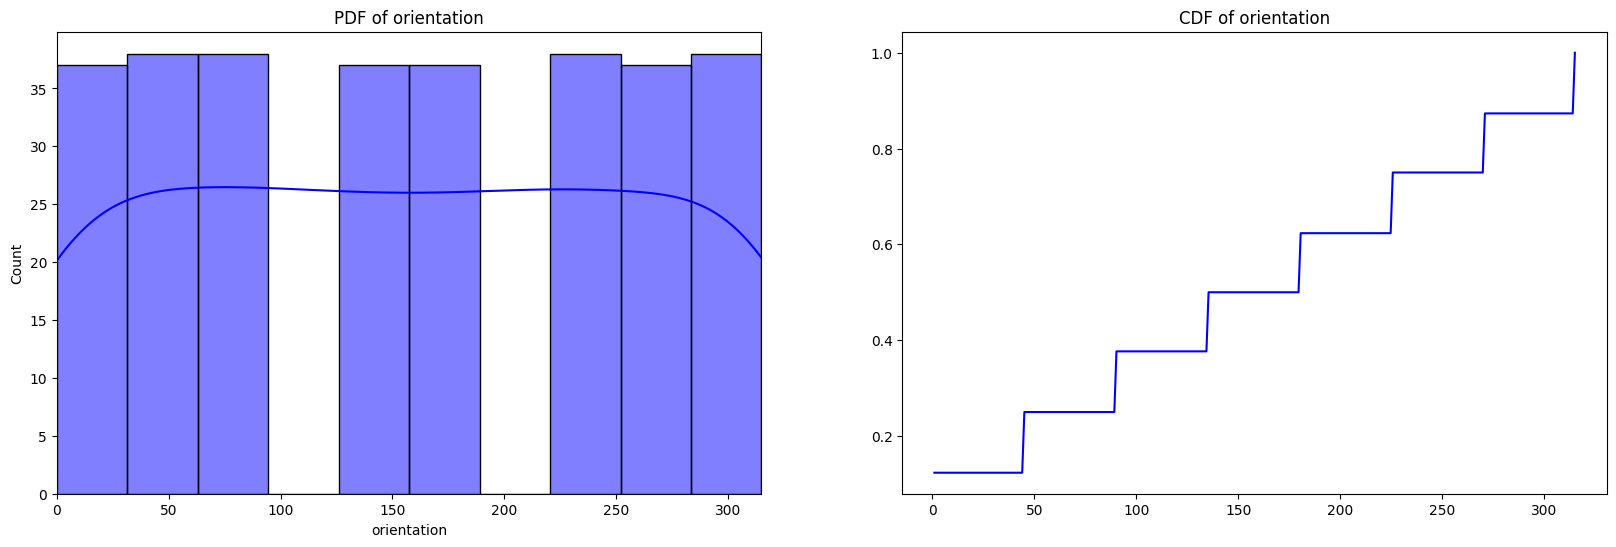

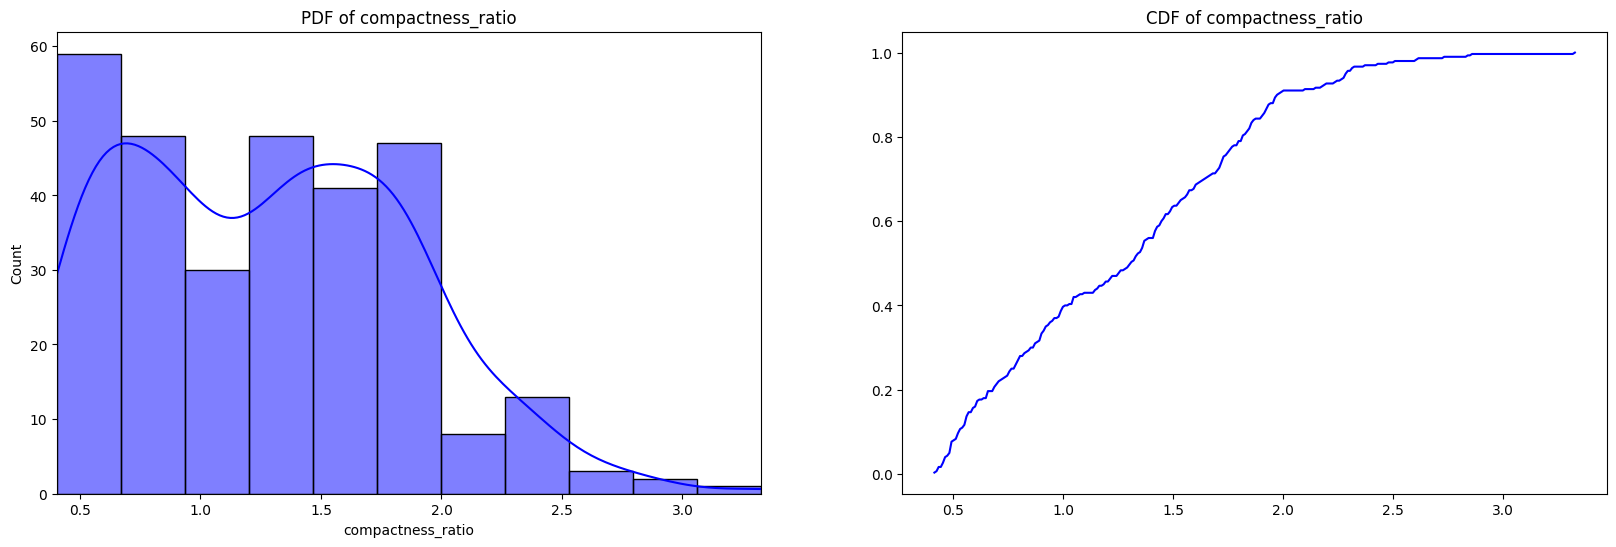

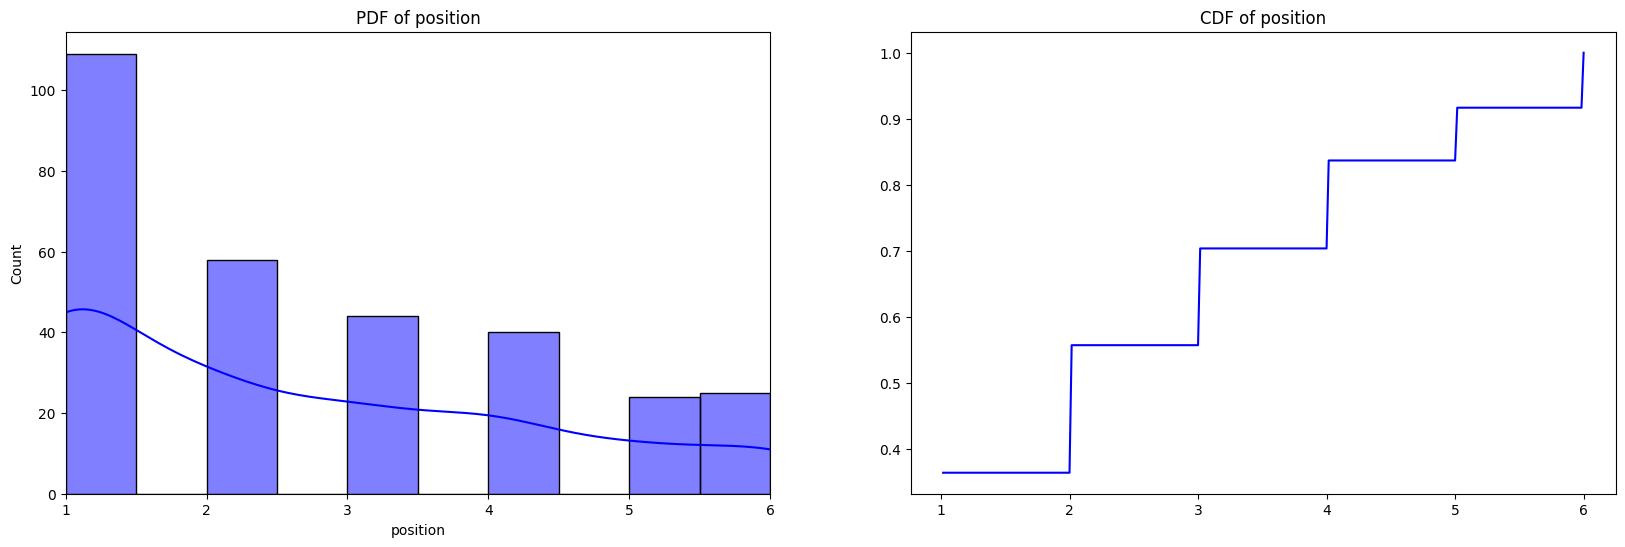

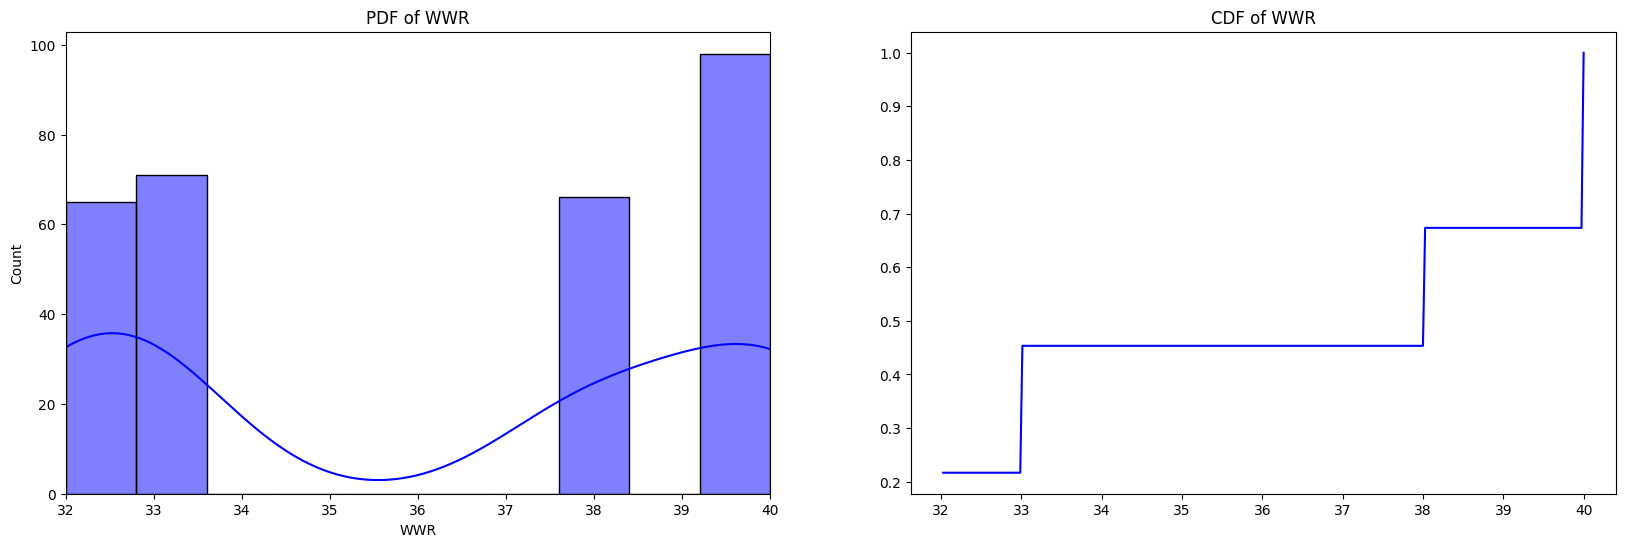

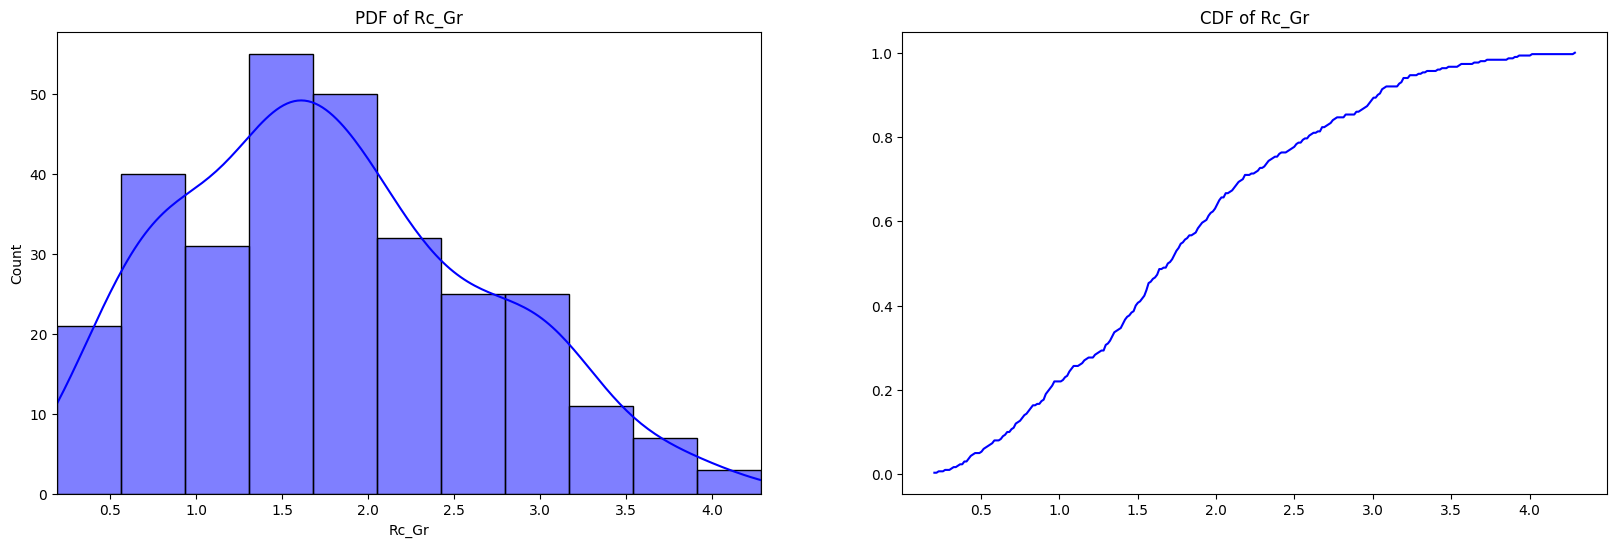

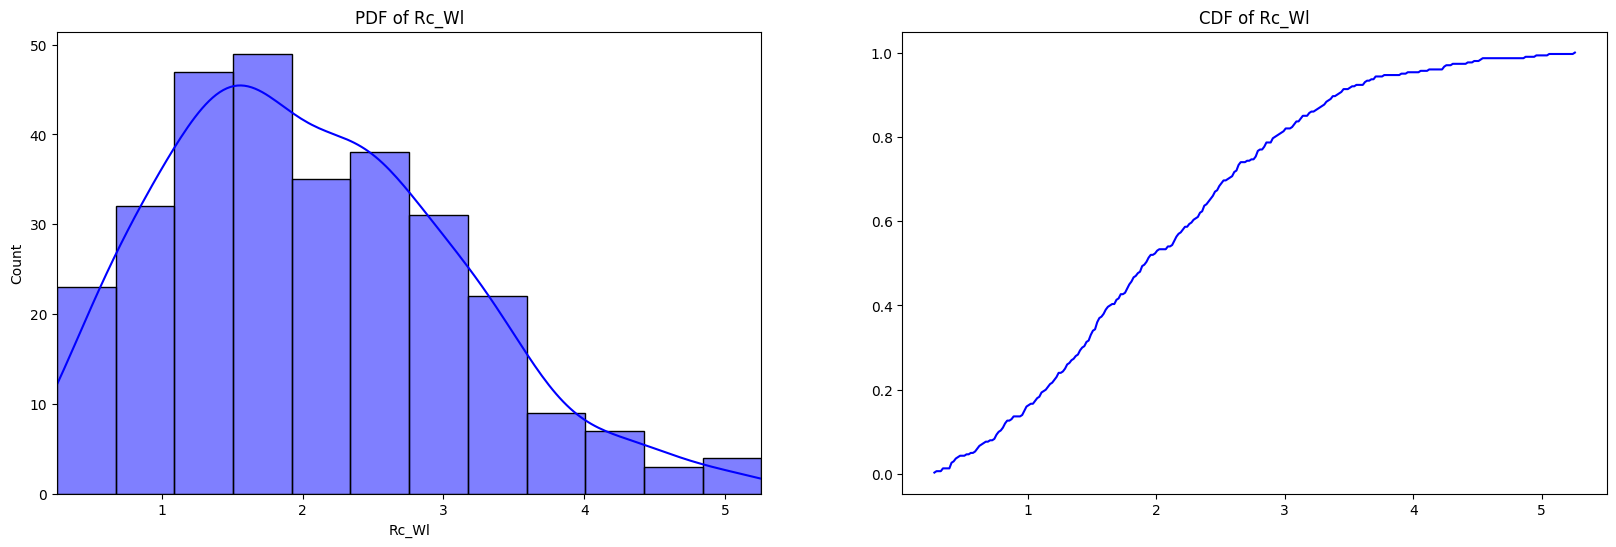

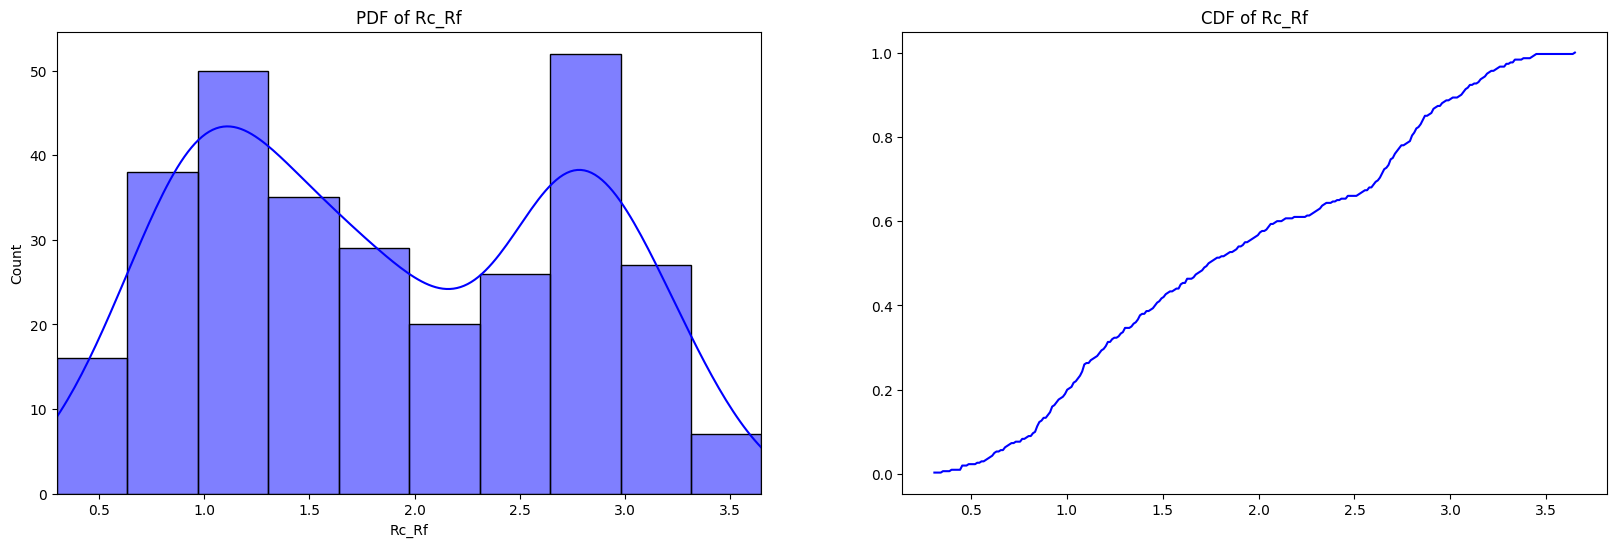

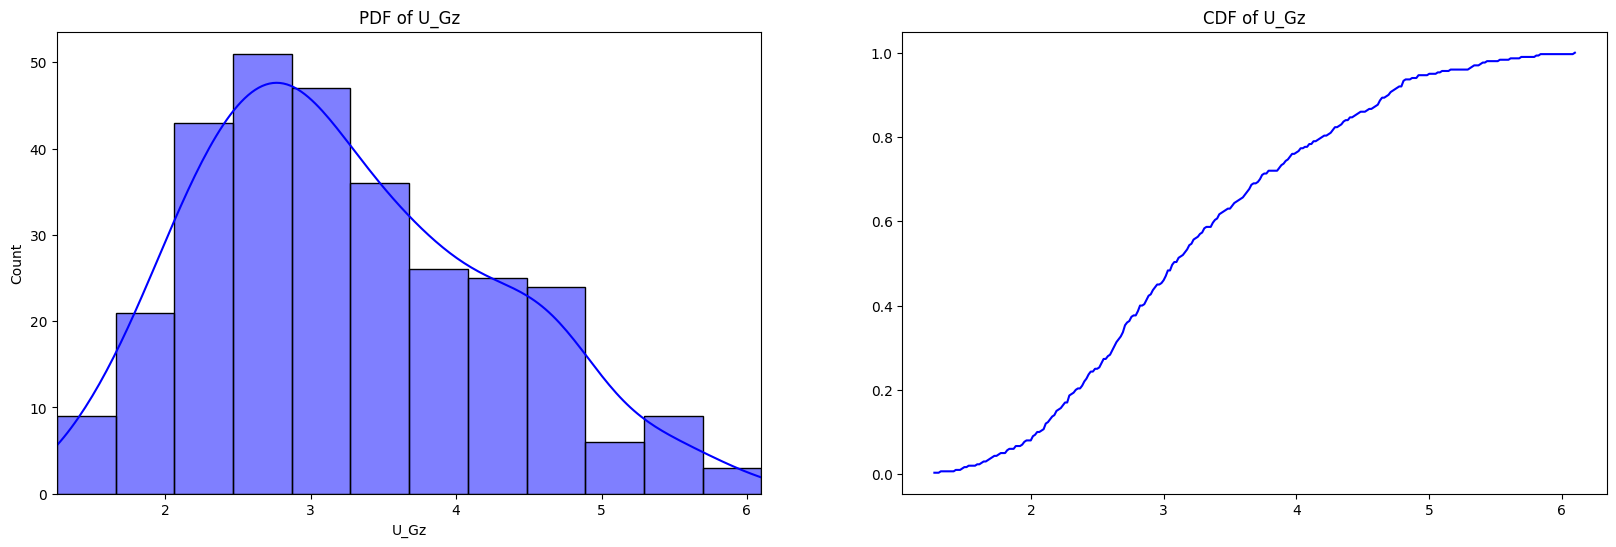

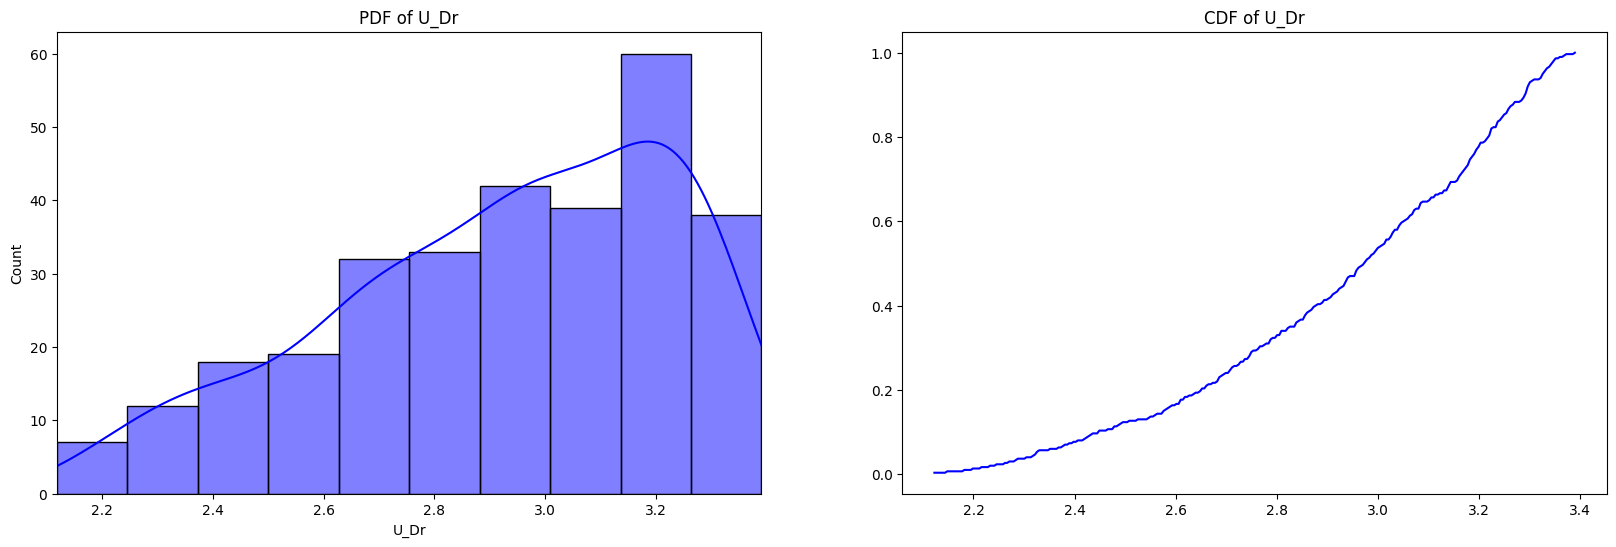

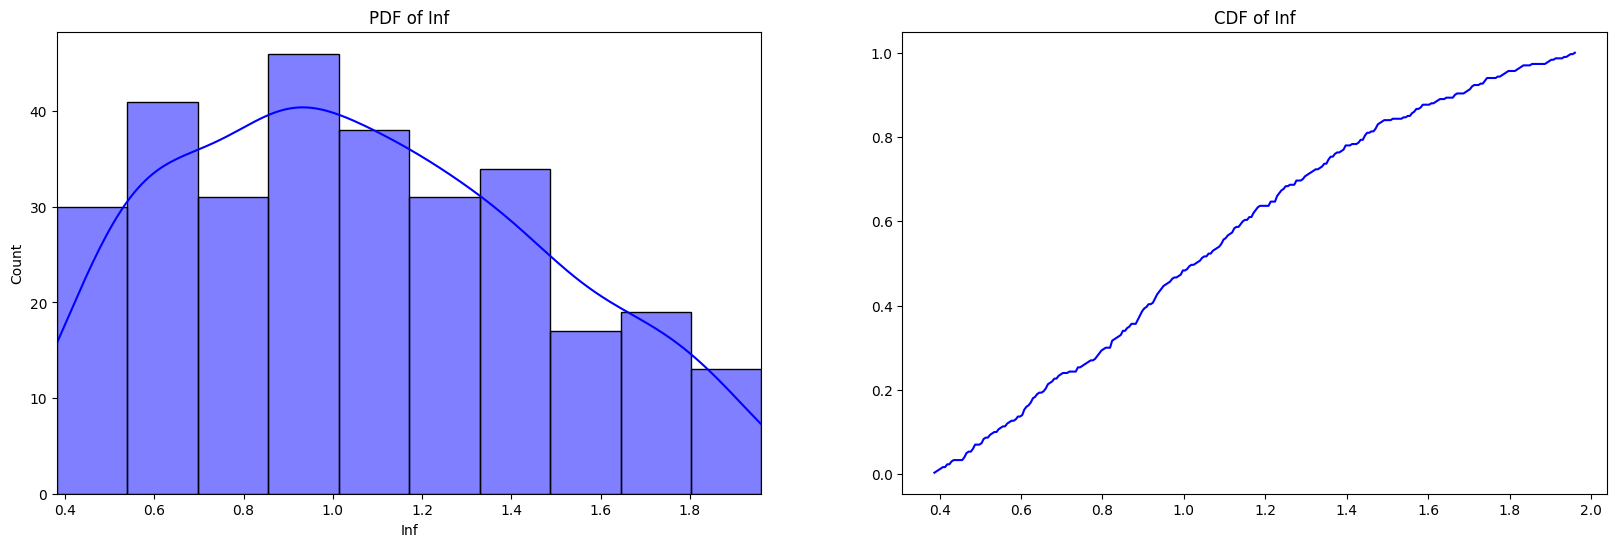

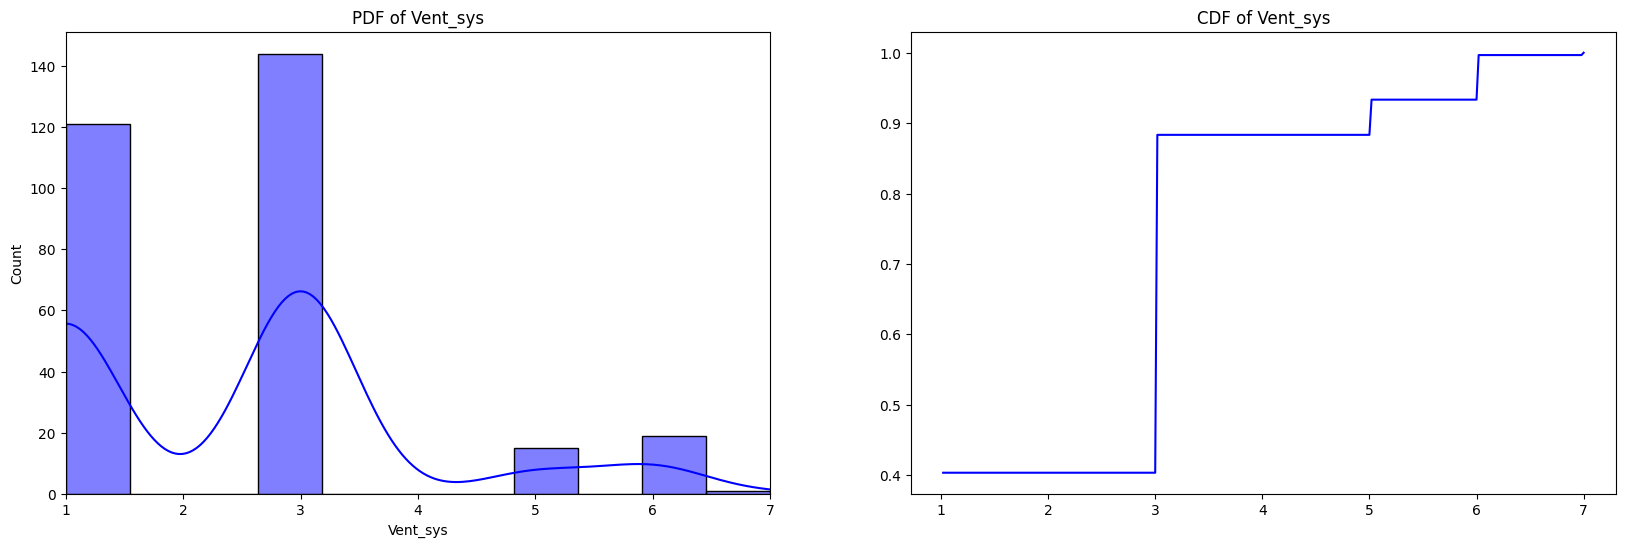

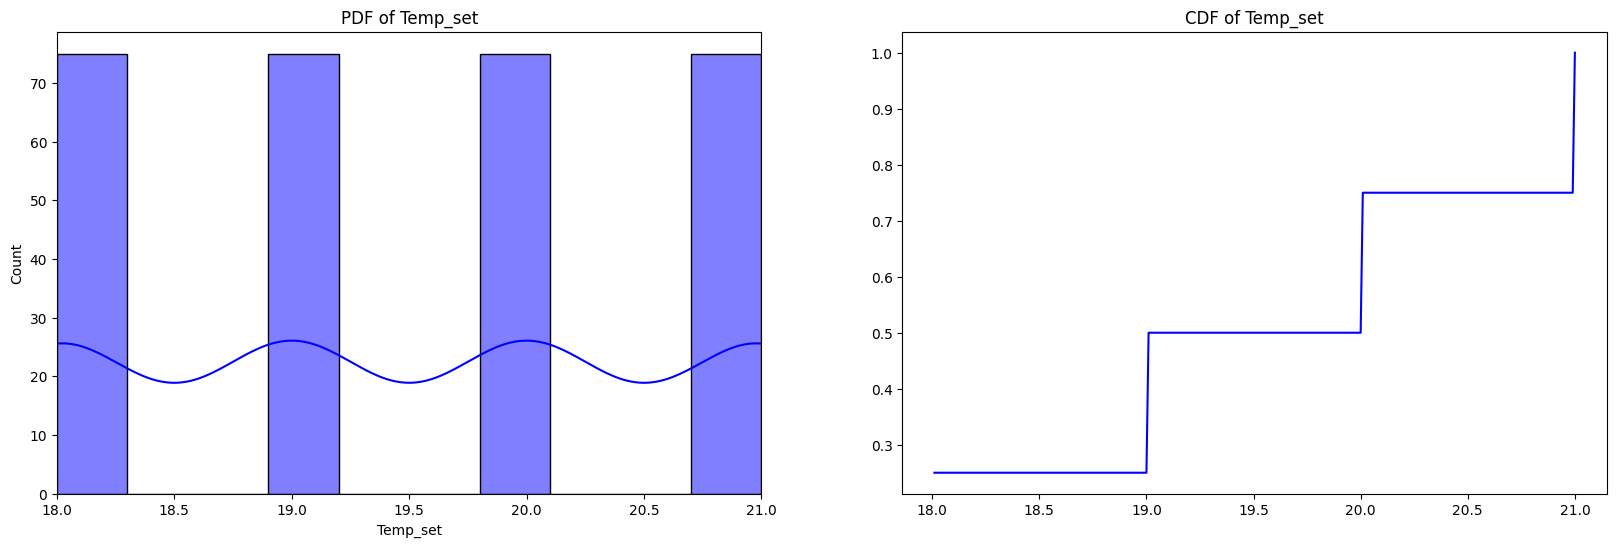

In [13]:
visualize_samples_and_plot_pdf_cdf(gen_sample)

## Saving sampled data as Excel files and making relavant directories for simulations

In [14]:
# Get the current working directory 
current_dir = Path().resolve()

#Navigate to the main project directory
main_project_dir = current_dir.parent

# Define the base directory realtive to the current working directory
base_dir = main_project_dir/'3.2_Rhino_grashopper_scripts'


# Define file names 
inp_file_name = f"{today}_inputfile_itr_{itr}_size_{sample_size}.xlsx"
out_file_name = f"{today}_outputfile_itr_{itr}_size_{sample_size}.xlsx"

# Define directory names
hbjson_dir_name = f"{today}_hbjson_itr_{itr}_size_{sample_size}"
simpar_dir_name = f"{today}_simpar_itr_{itr}_size_{sample_size}"
sqlfiles_dir_name = f"{today}_sqlfiles_itr_{itr}_size_{sample_size}"

# Define file paths
input_dir_path = os.path.join(base_dir, "1. Input_excel", inp_file_name)
output_dir_path = os.path.join(base_dir, "2. Output_excel", out_file_name)
hbjson_dir_path = os.path.join(base_dir, "3. HBjson", hbjson_dir_name)
simpar_dir_path = os.path.join(base_dir, "4. Sim_par", simpar_dir_name)
sqlfiles_dir_path = os.path.join(base_dir, "5. Sql_files", sqlfiles_dir_name)

# Create directories
os.makedirs(hbjson_dir_path, exist_ok=True)
os.makedirs(simpar_dir_path, exist_ok=True)
os.makedirs(sqlfiles_dir_path, exist_ok=True)

# Save sampled dataframe to input file. 
gen_sample.to_excel(input_dir_path, index = False)

# Add new columns for the output file
gen_sample_out = gen_sample.copy()
gen_sample_out['Heating_demand'] = ''
gen_sample_out['Underheated_hours'] = ''

# Save the new dataframe to output file. 
gen_sample_out.to_excel(output_dir_path, index = False)